# Micrograd Lab (Neural Network Simulation from Scratch!)

This is a great lab ledby Andrej Karpathy!

https://www.youtube.com/watch?v=VMj-3S1tku0&t=4249s&ab_channel=AndrejKarpathy


Objective:

This is the most step-by-step spelled-out explanation of backpropagation and training of neural networks. It only assumes basic knowledge of Python and a vague recollection of calculus.


# Introduction to Artificial Intelligence and Neural Networks

## What is Artificial Intelligence (AI)?

Artificial Intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think like humans and mimic their actions. The term can also apply to any machine that exhibits traits associated with a human mind, such as learning and problem-solving.

## Neural Networks

Neural networks are a core technology in AI, inspired by the structure and function of the human brain. At a basic level, a neural network is a series of algorithms that attempt to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks are used for a variety of tasks, including but not limited to, pattern recognition, classification, and prediction.

Neural networks consist of layers of interconnected nodes or "neurons", with each layer designed to perform specific transformations on its input data. These layers are typically categorized into three types:

- **Input Layer:** The initial layer that receives the input data.
- **Hidden Layers:** One or more layers that perform computations and feature extractions.
- **Output Layer:** The final layer that produces the prediction or classification.

## Backpropagation: The Heart of Learning

Backpropagation is a fundamental algorithm used for training neural networks. It allows the network to adjust its internal parameters (weights and biases) based on the error of the output compared to the expected result. Essentially, backpropagation calculates the gradient (the derivative of the error with respect to each parameter) of the error function by propagating the error backward through the network. This process involves two main phases:

1. **Forward Pass:** The input data is passed through the network layer by layer until it reaches the output. Each neuron applies a weighted sum on its inputs, followed by a non-linear activation function.

2. **Backward Pass (Backpropagation):** The error is calculated at the output and propagated back through the network, layer by layer, updating the weights and biases according to how much they contributed to the error. This is typically achieved using the gradient descent optimization algorithm or one of its variants.

### Arbitrary Numbers in Backpropagation
                                                                                                                     
In explaining backpropagation, we often use arbitrary numbers for weights, biases, inputs, and the learning rate to illustrate how the algorithm adjusts the network's parameters to minimize the error. These numbers serve to provide a concrete example of the calculations involved in backpropagation, making the abstract concepts more tangible and easier to understand.

By iteratively adjusting the weights and biases through backpropagation, the neural network learns to perform its task with increasing accuracy. This learning process continues until the network reaches a satisfactory level of performance or a specified number of iterations.

This lab will further explore the concept of backpropagation and its role in training neural networks, using practical examples and exercises.

---

Let's dive into the workings of neural networks and backpropagation through hands-on experiments in the following sections.


In [531]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [532]:
def f(x):
        return 3*x**2 - 4*x + 5 # Consider this arbitrary.

In [6]:
f(3.0)

20.0

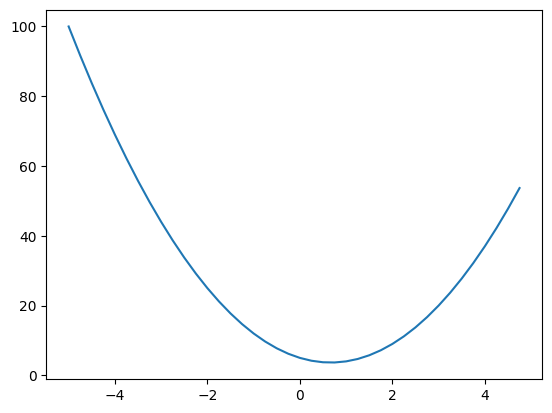

In [10]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs,ys)

In [16]:
h = 0.000001
x = 2/3 
(f(x + h) - f(x))/h

2.999378523327323e-06

In [18]:
# more complex
a = 2.0
b = -3.0 
c = 10.0
d= a*b + c
print(d)


4.0


In [19]:
h = 0.0001

# inputs
a = 2.0
b = -3.0 
c= 10.0

d1 = a*b +c
a += h # notation for bump it by (Could be ANY variable)
d2 = a*b +c

# printing out in a clean fashion. consider this normal practice for clean code outputs

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [658]:
#Building our Value object (Final Version)

class Value:

    def __init__(self,data, _children=(), _op='', label ='',):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    # Print Syntax. You won't want the adress code.
    def __repr__(self):
        return f"Value(data={self.data})"

    def  __add__(self,other):

        # If other is an instance of value, if it's not assume its a number and wrap it in Value
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self,other),'+')

        # += for the backward function fixes a major bug!
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        
        return out

        
    #Multiplying objects
    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self,other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out
        
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')
        
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out
        
    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self,other): # self / other
        return self * other**-1

    def __neg__(self): #-self
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def __radd__(self, other): # other * self
        return self + other
        
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 -t**2) * out.grad
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
            out._backward = _backward

        return out

    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
    
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


In [626]:
a = Value(2.0)
b = Value(3.0)
d = a.exp()
c = a-d
c

Value(data=-5.38905609893065)

In [379]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [380]:
d._op

'+'

In [470]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

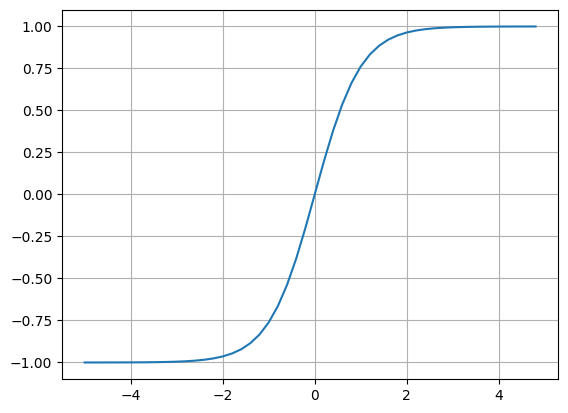

In [469]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [476]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#weight w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#bias of neuron
b = Value (6.8813735870195432, label='b')
# xw1w + x2w2 + b (with pointers)
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label= 'n'
o = n.tanh(); o.label = 'o'

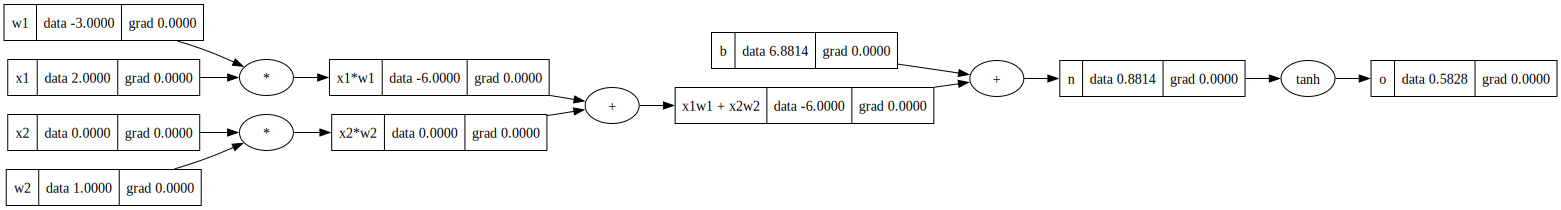

In [477]:
draw_dot(o)

In [478]:
o.backward()

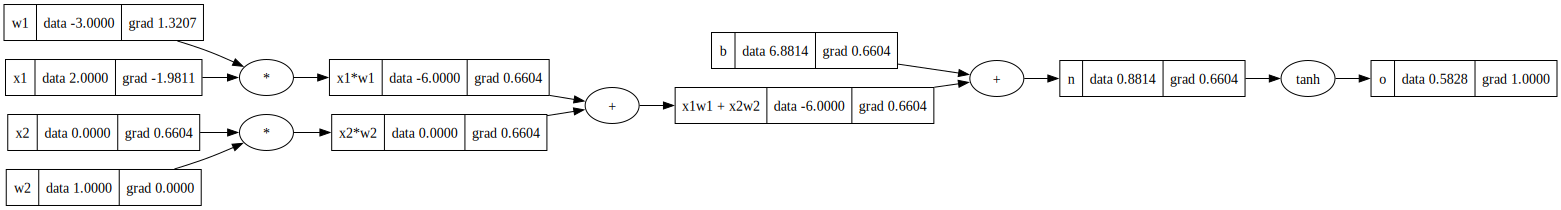

In [479]:
draw_dot(o)

Tanh can be boroken down in its other functions assuming we have the exp function defined in our program. It allows us to have more freedom with our program.

# Introducing PyTorch

What we've done thus far is recreate Micrograd which is not a deep neural network library that you would use in prod. It's a scalare value engine that makes the numbers you're working with cleaner for experimentation.

Pytorch uses tensors, which are algebraic objects that describe multilinear relationships between sets of algebraic objects in a relational vector space. These can be both vectors or scalars and can get extremely complex.

In [547]:
import torch
import random

In [548]:

x1 = torch.Tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double() ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double() ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double() ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double() ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [549]:
x1, x2, w1, w2, b, n, o,

(tensor([2.], dtype=torch.float64, requires_grad=True),
 tensor([0.], dtype=torch.float64, requires_grad=True),
 tensor([-3.], dtype=torch.float64, requires_grad=True),
 tensor([1.], dtype=torch.float64, requires_grad=True),
 tensor([6.8814], dtype=torch.float64, requires_grad=True),
 tensor([0.8814], dtype=torch.float64, grad_fn=<AddBackward0>),
 tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>))

In [936]:
class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(1,-1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=0.44386024238360866)

Now we can forward a single neuron! First, let's add some additional functionality allowing us to expand our Neural network. Let's add a layer function and a MLP function.

In [937]:
class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(1,-1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
class MLP:

    def __init__(self, nin,nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [938]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.1608786215164375)

In [939]:
n.parameters()

[Value(data=-0.18130471146825222),
 Value(data=-0.4257380739787857),
 Value(data=-0.10170294022780801),
 Value(data=0.5826961080340562),
 Value(data=0.7667003541810145),
 Value(data=-0.02833574689311824),
 Value(data=0.7143917431462763),
 Value(data=-0.11303527318672946),
 Value(data=0.7301642401296529),
 Value(data=0.23450974813549652),
 Value(data=-0.2888124426526262),
 Value(data=-0.5023190070876788),
 Value(data=-0.6511880037818187),
 Value(data=-0.5973726756385493),
 Value(data=0.11163290829932326),
 Value(data=-0.6868248682584892),
 Value(data=0.03409741899910612),
 Value(data=0.4773595187392119),
 Value(data=0.9185650838411574),
 Value(data=0.924314145938246),
 Value(data=-0.14605431564131965),
 Value(data=0.47044667674246465),
 Value(data=-0.4664790937305243),
 Value(data=-0.7981744359747598),
 Value(data=0.8443608904300572),
 Value(data=0.16786103632305438),
 Value(data=-0.7650551503904701),
 Value(data=0.607038620751821),
 Value(data=0.024866714127344647),
 Value(data=0.74400

In [940]:
len(n.parameters())

41

In [941]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0],
]

ys = [1.0, -1.0, -1.0, 1.0] #desired targets

In [975]:
# forward pass

for k in range(60):
    # forward pass   
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    
    # backwards pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    
    # update
    for p in n.parameters():
        p.data += -0.05 * p.grad
    print(k, loss.data)

0 0.0009127280963062478
1 0.0009116855048570874
2 0.0009106451903934669
3 0.0009096071455698213
4 0.0009085713630718949
5 0.0009075378356166125
6 0.000906506555951894
7 0.0009054775168565259
8 0.0009044507111399397
9 0.0009034261316421181
10 0.0009024037712333571
11 0.0009013836228142157
12 0.0009003656793152165
13 0.0008993499336967961
14 0.0008983363789491231
15 0.0008973250080919284
16 0.0008963158141743182
17 0.0008953087902747038
18 0.0008943039295005737
19 0.0008933012249883684
20 0.000892300669903342
21 0.0008913022574393878
22 0.0008903059808188917
23 0.0008893118332926209
24 0.0008883198081395234
25 0.0008873298986665995
26 0.0008863420982087871
27 0.0008853564001287849
28 0.00088437279781689
29 0.0008833912846909235
30 0.0008824118541960027
31 0.0008814344998044905
32 0.0008804592150157477
33 0.0008794859933561175
34 0.0008785148283786696
35 0.0008775457136631439
36 0.0008765786428157805
37 0.0008756136094691901
38 0.0008746506072821968
39 0.0008736896299397642
40 0.000872730

In [976]:
ypred

[Value(data=0.9864615934521632),
 Value(data=-0.984246667052026),
 Value(data=-0.9868140043598318),
 Value(data=0.9842025518215868)]

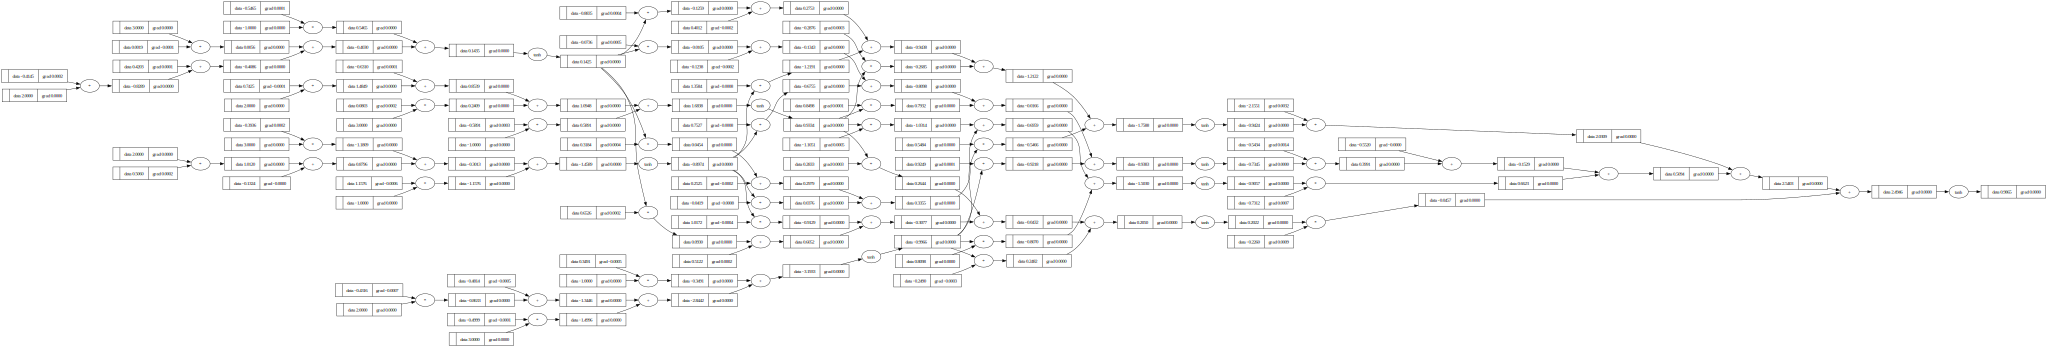

In [977]:
draw_dot(n(x))